<a href="https://colab.research.google.com/github/Kiran-01/GAN/blob/main/ConditionalGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
cd drive/MyDrive/


/content/drive/MyDrive


In [3]:
!mkdir CGaN_MNIST

mkdir: cannot create directory ‘CGaN_MNIST’: File exists


In [4]:
cd CGaN_MNIST

/content/drive/MyDrive/CGaN_MNIST


In [5]:
# importing the dependencies
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [6]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz

--2022-02-09 07:41:43--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.170.88
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.170.88|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  13.9MB/s    in 1.8s    

2022-02-09 07:41:45 (13.9 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2022-02-09 07:41:45--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.170.88
Connecting to fashion-mnist.s3-website.eu-central-1.amaz

In [7]:
!mkdir MNIST_Fashion
!cp *.gz MNIST_Fashion/
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_Fashion/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_Fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_Fashion/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_Fashion/t10k-images-idx3-ubyte.gz
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_Fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
# Training Parameters
learning_rate =  0.0002
batch_size = 128
epochs = 100000

# Network Parameters
image_dim = 784   # image size of 28*28
Y_dimension = 10       #-------
gen_hidd_dim = 256
disc_hidd_dim = 256
z_noise_dim = 100   # input noise datapoint


def xavier_init(shape):
  return tf.random_normal(shape = shape, stddev = 1./tf.sqrt(shape[0]/2.0))

In [9]:

# define weights and bias dictionaries
weights = {"disc_H" : tf.Variable(xavier_init([image_dim + Y_dimension, disc_hidd_dim])),
           "disc_final" : tf.Variable(xavier_init([disc_hidd_dim, 1])),
           "gen_H" : tf.Variable(xavier_init([z_noise_dim + Y_dimension, gen_hidd_dim])),
           "gen_final" : tf.Variable(xavier_init([gen_hidd_dim, image_dim]))
           }

bias =  {"disc_H" : tf.Variable(xavier_init([disc_hidd_dim])),
           "disc_final" : tf.Variable(xavier_init([1])),
           "gen_H" : tf.Variable(xavier_init([gen_hidd_dim])),
           "gen_final" : tf.Variable(xavier_init([image_dim]))
           }

In [10]:
# createthe computational graph
# Define Discriminator function

# Define the patchholders for External input
z_input = tf.placeholder(tf.float32, shape = [None, z_noise_dim], name = "input_noise")
Y_input = tf.placeholder(tf.float32, shape = [None, Y_dimension], name = "Labels")
x_input = tf.placeholder(tf.float32, shape = [None, image_dim], name = "real_input")

def Discriminator(x, y):
  inputs = tf.concat(axis = 1, values = [x,y])
  hidden_layer = tf.nn.relu(tf.add(tf.matmul(inputs, weights["disc_H"]), bias["disc_H"]))
  final_layer = tf.add(tf.matmul(hidden_layer, weights["disc_final"]), bias["disc_final"])
  disc_output = tf.nn.sigmoid(final_layer)
  return final_layer, disc_output

def Generator(x, y):
  inputs = tf.concat(axis = 1, values = [x,y])
  hidden_layer = tf.nn.relu(tf.add(tf.matmul(inputs, weights["gen_H"]), bias["gen_H"]))
  final_layer = tf.add(tf.matmul(hidden_layer, weights["gen_final"]), bias["gen_final"])
  gen_output = tf.nn.sigmoid(final_layer)
  return gen_output



# Building the generator network
# with tf.name_scope("Generator") as scope:
output_gen = Generator(z_input, Y_input)

# Building the Discriminator Network
# with tf.name_scope("Discriminator") as scope:
real_output1_Disc, real_output_Disc = Discriminator(x_input, Y_input)   #implements D(x)
fake_output1_Disc, fake_output_Disc = Discriminator(output_gen, Y_input)  #implements D(G(x))



In [11]:
# # First kind of loss
# with tf.name_scope("Discriminator_Loss") as scope:
#   Discriminator_Loss = -tf.reduce_mean(tf.log(real_output_Disc + 0.0001) + tf.log(1. -  fake_output_Disc + 0.0001 )) 

# with tf.name_scope("Generato_Loss") as scope:
#   Generator_Loss = -tf.reduce_mean(tf.log(fake_output_Disc + 0.0001))  #Due to max log(D(G(z)))

# # Tensorboard Summary
# Disc_loss_total = tf.summary.scalar("Disc_Total_loss", Discriminator_Loss)
# Gen_loss_total = tf.summary.scalar("Gen_Loss", Generator_Loss)

In [12]:
# second type of loss

# with tf.name_scope("Discrinator_Loss") as scope:
Disc_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real_output1_Disc, labels = tf.ones_like(real_output1_Disc)))
Disc_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_output1_Disc, labels = tf.zeros_like(fake_output1_Disc)))
Discriminator_Loss = Disc_real_loss + Disc_fake_loss

# with tf.name_scope("Generator_Loss") as scope:
Generator_Loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_output1_Disc, labels = tf.ones_like(fake_output1_Disc)))


#Tensorboard Summary
Disc_loss_real_summary = tf.summary.scalar("Disc_loss_real", Disc_real_loss)
Disc_loss_fake_summary = tf.summary.scalar("Disc_loss_fake", Disc_fake_loss)
Disc_loss_summary = tf.summary.scalar("Disc_Total_loss", Discriminator_Loss)

Disc_loss_total = tf.summary.merge([Disc_loss_real_summary, Disc_loss_fake_summary, Disc_loss_summary])
Gen_loss_total = tf.summary.scalar("Gen_Loss", Generator_Loss)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
# Define the variable

Generator_var = [weights["gen_H"],weights["gen_final"], bias["gen_H"], bias["gen_final"]]
Discriminator_var = [weights["disc_H"], weights["disc_final"], bias["disc_H"], bias["disc_final"]]


# define the optimizer
# with tf.name_scope("Optimizer_Discriminator") as scope:
Discriminator_optimize = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(Discriminator_Loss, var_list=Discriminator_var)

# with tf.name_scope("Optimizer_Generator") as scope:
Generator_optimize = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(Generator_Loss, var_list = Generator_var)

In [14]:
# Initialize the variable
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
writer = tf.summary.FileWriter("./log", sess.graph)

for epoch in range(epochs):
  x_batch, Y_label = mnist.train.next_batch(batch_size)

# generate noise to feed Discriminator
  z_noise = np.random.uniform(-1., 1., size=[batch_size, z_noise_dim])
  _, Disc_loss_epoch = sess.run([Discriminator_optimize, Discriminator_Loss], feed_dict={x_input:x_batch, Y_input:Y_label, z_input:z_noise})
  _, Gen_loss_epoch = sess.run([Generator_optimize, Generator_Loss], feed_dict={ z_input:z_noise, Y_input:Y_label})



# Running the Discriminator summary
  summary_Disc_Loss = sess.run(Disc_loss_total, feed_dict = {x_input:x_batch, z_input:z_noise, Y_input:Y_label })


# Adding the discriminator summary
  writer.add_summary(summary_Disc_Loss, epoch)

# Running the generator summary

  summary_Gen_Loss = sess.run(Gen_loss_total, feed_dict = {z_input:z_noise, Y_input:Y_label})

# Adding the generator summary
  writer.add_summary(summary_Gen_Loss, epoch)


  if epoch % 2000 == 0:
    print("Steps : {0}   : Generator Loss : {1}, Discriminator Loss : {2}".format(epoch,Gen_loss_epoch,Disc_loss_epoch))

Steps : 0   : Generator Loss : 1.1547197103500366, Discriminator Loss : 1.3302198648452759
Steps : 2000   : Generator Loss : 7.079978942871094, Discriminator Loss : 0.026985187083482742
Steps : 4000   : Generator Loss : 4.987832069396973, Discriminator Loss : 0.13259074091911316
Steps : 6000   : Generator Loss : 3.744708299636841, Discriminator Loss : 0.13845029473304749
Steps : 8000   : Generator Loss : 4.536066055297852, Discriminator Loss : 0.23471669852733612
Steps : 10000   : Generator Loss : 4.70565128326416, Discriminator Loss : 0.19452598690986633
Steps : 12000   : Generator Loss : 4.1786956787109375, Discriminator Loss : 0.3713340759277344
Steps : 14000   : Generator Loss : 3.6539065837860107, Discriminator Loss : 0.3159973621368408
Steps : 16000   : Generator Loss : 3.839022397994995, Discriminator Loss : 0.34846845269203186
Steps : 18000   : Generator Loss : 4.060501575469971, Discriminator Loss : 0.3713769316673279
Steps : 20000   : Generator Loss : 3.791710376739502, Discr

In [15]:
# # Testing
# # Generating images from noise, using the generator network.
# n = 6
# canvas = np.empty((28 * n, 28 * n))
# for i in range n:
#   # Noise Input
#   z_noise = np.random.uniform(-1., 1., size = [batch_size, z_noise_dim])
#   # generate images from noise
#   g = sess.run(output_Gen, feed_dict={z_input:z_noise})
#   # Reverse colors for better display
#   g = -1 * (g-1)
#   for j in range(n):
#     # Draw the genrated digits
#     canvas[i * 28:(i + 1) * 28, j * 28:(j+1) * 28] = g[j].reshape([28, 28])


# plt.figure(figsize=(n,n))
# plt.imshow(canvas, origin="upper", cmap="gray")
# plt.show()

In [16]:
import matplotlib.gridspec as gridspec
def generate_plot(samples):
  fig = plt.figure(figsize=(4, 4))
  gs = gridspec.GridSpec(4,4)
  gs.update(wspace = 0.05,hspace = 0.05)

  for i, sample in enumerate(samples):
    ax = plt.subplot(gs[i])
    plt.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    plt.imshow(sample.reshape(28, 28), cmap='gray')

  return fig

In [17]:
def create(inp):
  feature_map = {"t-shirt":0,
                 "trouser":1,
                 "pullover":2,
                 "dress":3,
                 "coat":4,
                 "sandal":5,
                 "shirt":6,
                 "sneaker":7,
                 "bag":8,
                 "ankle boot":9}


# Number of samples tobe displayed for each category
  samples = 16
  z_noise = np.random.uniform(-1., 1., size= [samples, z_noise_dim])

# create one-hot label vector
  Y_label = np.zeros(shape = [samples, Y_dimension])
  Y_label[:, feature_map[inp]] = 1

# run the trained generator excluding discriminator
  generated_samples = sess.run(output_gen, feed_dict = {z_input:z_noise, Y_input:Y_label})

# plotting th image
  generate_plot(generated_samples)

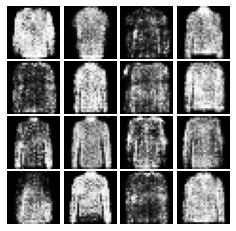

In [18]:
create("shirt")

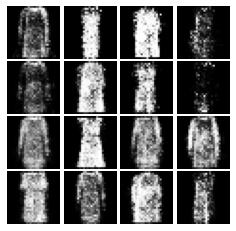

In [22]:
create("dress")

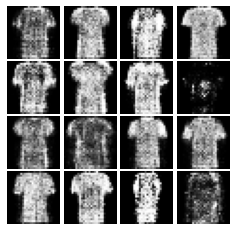

In [23]:
create("t-shirt")

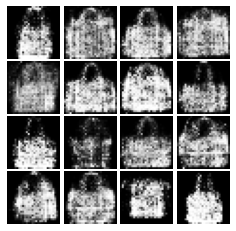

In [24]:
create("bag")

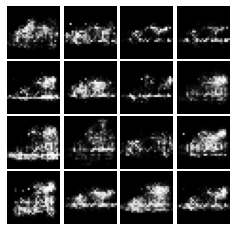

In [25]:
create("sandal")

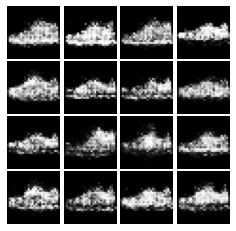

In [26]:
create("sneaker")

In [21]:
# # Saving the figure
# fig =gen_plot(generated_samples)
# plt.savefig('out/{}.png'.format(str("test").zfill(3)), bbox_inches = 'tight')